In [1]:
#---- set up ---
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np


#----- Visualiation -----
import matplotlib.pyplot as plt

# Konfigurasi font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Konfigurasi judul tebal
plt.rcParams['axes.titleweight'] = 'bold'
import seaborn as sns

# ---- Preprocessing ----
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#---- Model ----
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#--- Evaluation ---
from sklearn.metrics import (
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

```
trans_date_trans_time: The date and time of the transaction.

cc_num: credit card number.

merchant: Merchant who was getting paid.

category: In what area does that merchant deal.

amt: Amount of money in American Dollars.

first: first name of the card holder.

last: last name of the card holder.

gender: Gender of the cardholder.Just male and female!

street:Street of card holder residence

city:city of card holder residence

state:state of card holder residence

zip:ZIP code of card holder residence

lat:latitude of card holder

long:longitude of card holder

city_pop:Population of the city

job:trade of the card holder

dob:Date of birth of the card holder

trans_num: Transaction ID

unix_time: Unix time which is the time calculated since 1970 to today.

merch_lat: latitude of the merchant

merch_long:longitude of the merchant

is_fraud: Whether the transaction is fraud(1) or not(0)

```

#  Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Bootcamp AI/fraudTrain.csv").drop('Unnamed: 0',axis=1)

In [5]:
df.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


# Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [7]:
df['datetime'] = pd.to_datetime(df['unix_time'], unit='s')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])


df["datetime"].unique()

<DatetimeArray>
['2012-01-01 00:00:18', '2012-01-01 00:00:44', '2012-01-01 00:00:51',
 '2012-01-01 00:01:16', '2012-01-01 00:03:06', '2012-01-01 00:04:08',
 '2012-01-01 00:04:42', '2012-01-01 00:05:08', '2012-01-01 00:05:18',
 '2012-01-01 00:06:01',
 ...
 '2013-06-21 12:08:42', '2013-06-21 12:09:22', '2013-06-21 12:10:56',
 '2013-06-21 12:11:23', '2013-06-21 12:11:36', '2013-06-21 12:12:08',
 '2013-06-21 12:12:19', '2013-06-21 12:12:32', '2013-06-21 12:13:36',
 '2013-06-21 12:13:37']
Length: 1274823, dtype: datetime64[ns]

In [9]:
# --- check unique value dari tipe data categorical
print(f"Total Data {df.shape[0]}")
for x in df.select_dtypes(include='O').columns:
    print(f"--- {x}----")
    print(f"Uniqeu Value:  {df[x].nunique()}")
    print()

Total Data 1296675
--- merchant----
Uniqeu Value:  693

--- category----
Uniqeu Value:  14

--- first----
Uniqeu Value:  352

--- last----
Uniqeu Value:  481

--- gender----
Uniqeu Value:  2

--- street----
Uniqeu Value:  983

--- city----
Uniqeu Value:  894

--- state----
Uniqeu Value:  51

--- job----
Uniqeu Value:  494

--- trans_num----
Uniqeu Value:  1296675



total data yang dimiliki yaitu 1296675, pada pemeriksaan data jumlah merchant sebanyak 693

In [10]:
# Feature Engineering
df["transaction_hour"] = df["trans_date_trans_time"].dt.hour
df["transaction_day_of_week"] = df["trans_date_trans_time"].dt.dayofweek #0 adalah senin dan 6 adalah minggu
df["transation_day"] = df["trans_date_trans_time"].dt.day

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,datetime,transaction_hour,transaction_day_of_week,transation_day
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2012-01-01 00:00:18,0,1,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2012-01-01 00:00:44,0,1,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2012-01-01 00:00:51,0,1,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2012-01-01 00:01:16,0,1,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2012-01-01 00:03:06,0,1,1


In [11]:
o = df["job"].value_counts().reset_index()

o["kategorisasi"] = ['other' if x <8270 else x for x in o["count"]]
o

,job,count,kategorisasi
0,Film/video editor,9779,9779
1,Exhibition designer,9199,9199
2,Naval architect,8684,8684
3,"Surveyor, land/geomatics",8680,8680
4,Materials engineer,8270,8270
...,...,...,...
489,Information officer,8,other
490,Veterinary surgeon,8,other
491,Ship broker,7,other
492,Contracting civil engineer,7,other


<Axes: title={'center': 'Fraud Transaction in Hour'}, xlabel='transaction_hour'>

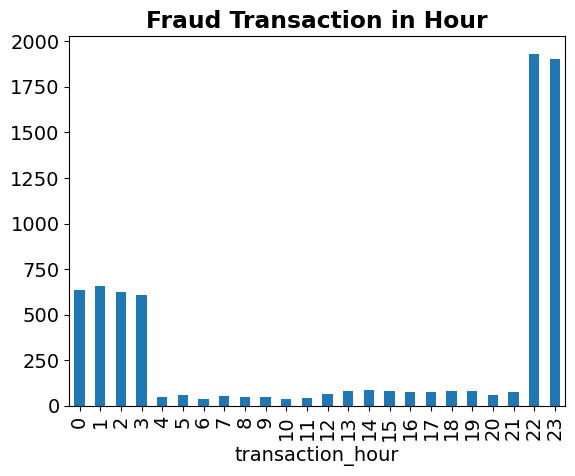

In [12]:
df[(df["is_fraud"]==1)]["transaction_hour"].value_counts().sort_index().plot(kind="bar",title="Fraud Transaction in Hour")

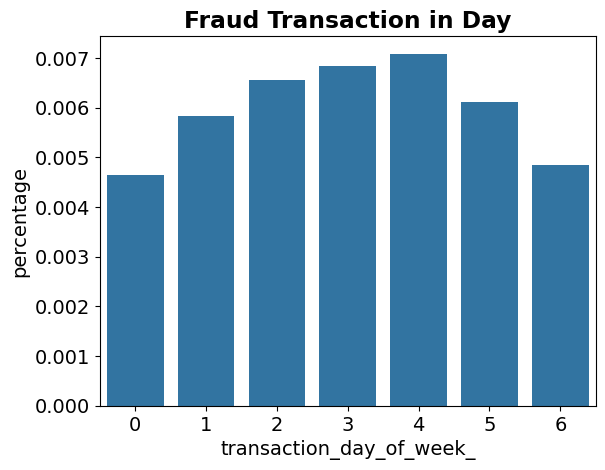

In [13]:
hour_trx_fraud = df.groupby(
    ['transaction_day_of_week'],as_index=False
).agg({
    "is_fraud":["count","sum"]
})

hour_trx_fraud.columns = ['_'.join(x) for x in hour_trx_fraud.columns]
hour_trx_fraud["percentage"] = hour_trx_fraud.is_fraud_sum/hour_trx_fraud.is_fraud_count

plt.title("Fraud Transaction in Day")
sns.barplot(data=hour_trx_fraud,y="percentage",x="transaction_day_of_week_",orient="v");

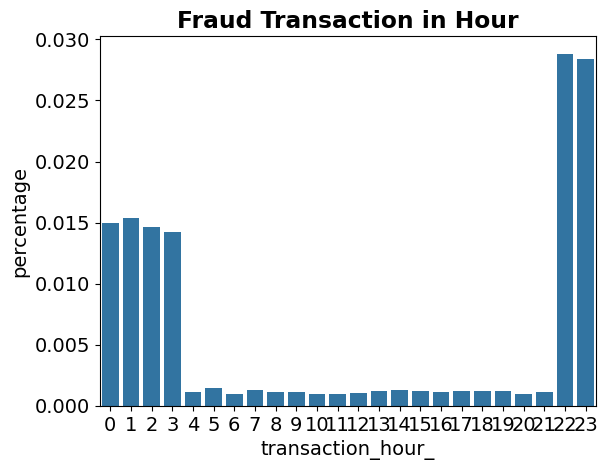

In [14]:
hour_trx_fraud = df.groupby(
    ['transaction_hour'],as_index=False
).agg({
    "is_fraud":["count","sum"]
})

hour_trx_fraud.columns = ['_'.join(x) for x in hour_trx_fraud.columns]
hour_trx_fraud["percentage"] = hour_trx_fraud.is_fraud_sum/hour_trx_fraud.is_fraud_count

plt.title("Fraud Transaction in Hour")
sns.barplot(data=hour_trx_fraud,y="percentage",x="transaction_hour_",orient="v")

plt.show()

In [15]:
#menghitung jarak kejadian transaksi
import math

def haversine_distance(lat1,lon1,lat2,lon2):
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat/2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    radius_bumi = 6371 #satuan km

    distance = radius_bumi * c

    return distance

df["distance_sender_receiver"] = df.apply(lambda row:haversine_distance(row["lat"],row["long"],row["merch_lat"],row["merch_long"]),axis=1).round(2)

<Axes: xlabel='distance_sender_receiver'>

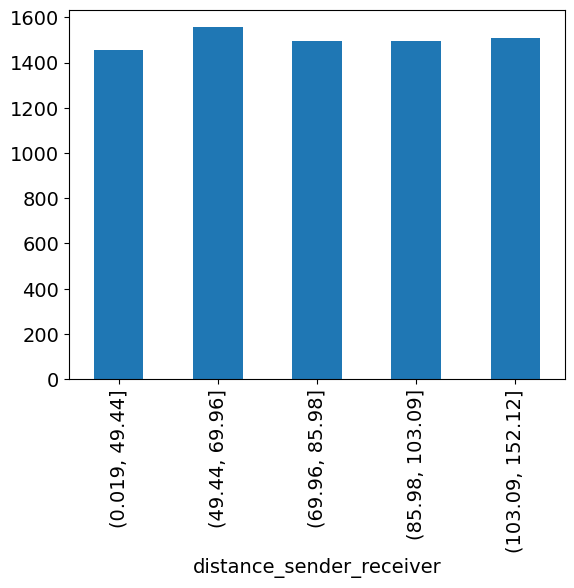

In [16]:
df.groupby(pd.qcut(
    df["distance_sender_receiver"],q=5
))["is_fraud"].sum().plot(kind="bar")

<Axes: xlabel='amt'>

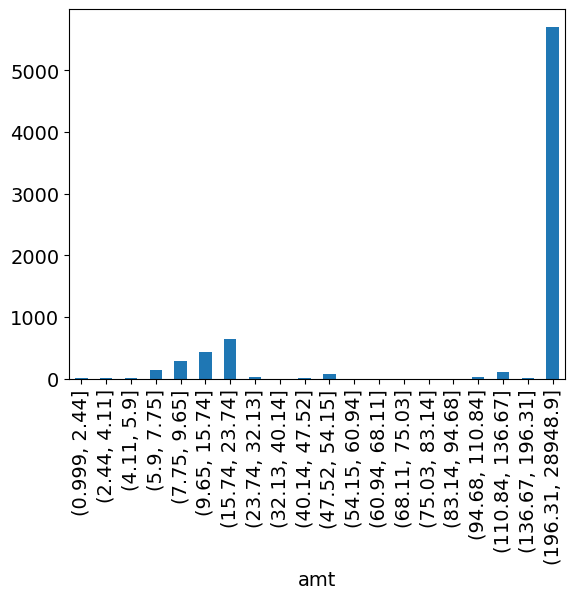

In [17]:
df.groupby(pd.qcut(
    df["amt"],q=20
))["is_fraud"].sum().plot(kind="bar")

In [18]:
from datetime import datetime

df["Age"] = df["dob"].apply(lambda row : (datetime.now() - row).days/365.25)
df["Age"] = df["Age"].round(0)

<Axes: xlabel='Age'>

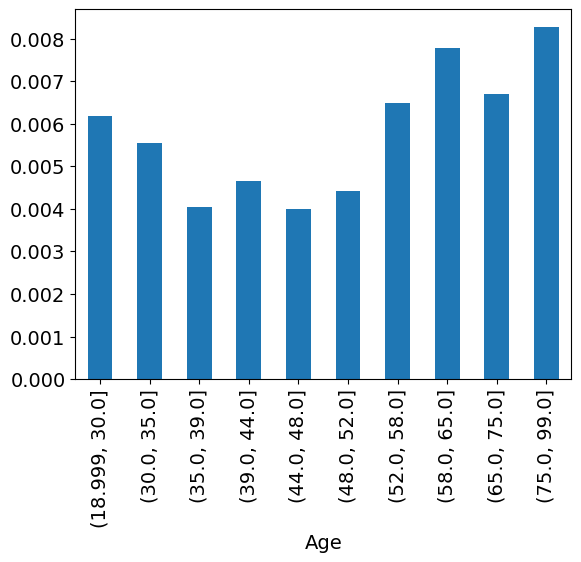

In [19]:
df.groupby(pd.qcut(
    df["Age"],q=10
))["is_fraud"].mean().plot(kind="bar")

# Preprocessing

In [20]:
cols_keep = ["amt","distance_sender_receiver","transaction_hour","transaction_day_of_week","city_pop","Age"]

X = df[cols_keep]
y= df[["is_fraud"]]



X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

In [21]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [22]:
def calculate_metrics(model, X_train, y_train, X_test, y_test):

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred)


    test_accuracy = balanced_accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)


    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
        'Train': [train_accuracy, train_precision, train_recall, train_f1, train_roc_auc],
        'Test': [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]
    })

    return metrics_df


metrics_df = calculate_metrics(pipeline, X_train, y_train, X_test, y_test)
metrics_df

,Metric,Train,Test
0,Accuracy,0.499712,0.499729
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000
3,F1 Score,0.000000,0.000000
4,ROC AUC,0.499712,0.499729


In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [24]:
metrics_df = calculate_metrics(pipeline, X_train, y_train, X_test, y_test)
metrics_df

,Metric,Train,Test
0,Accuracy,0.999524,0.768555
1,Precision,1.000000,0.831731
2,Recall,0.999048,0.537744
3,F1 Score,0.999524,0.653182
4,ROC AUC,0.999524,0.768555


In [25]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=42))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [26]:
metrics_df = calculate_metrics(pipeline, X_train, y_train, X_test, y_test)
metrics_df

,Metric,Train,Test
0,Accuracy,0.812716,0.775829
1,Precision,0.906284,0.813072
2,Recall,0.625809,0.552398
3,F1 Score,0.740374,0.657853
4,ROC AUC,0.812716,0.775829


# Downsampling

In [27]:
df_not_fraud = df[df["is_fraud"]==0].copy()
df_fraud =  df[df["is_fraud"]==1].copy()


df_not_fraud_down_sampling  = df_not_fraud.sample(frac=0.75,random_state=42)


#combine again
df_final = pd.concat([df_not_fraud_down_sampling,df_fraud]).reset_index(drop=True)

In [28]:
X = df_final[cols_keep]
y = df_final[["is_fraud"]]



X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

In [29]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [30]:
metrics_df = calculate_metrics(pipeline, X_train, y_train, X_test, y_test)
metrics_df

,Metric,Train,Test
0,Accuracy,0.499551,0.499516
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000
3,F1 Score,0.000000,0.000000
4,ROC AUC,0.499551,0.499516


In [31]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42,max_depth=3))])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=3, random_state=42))])

In [32]:
metrics_df = calculate_metrics(pipeline, X_train, y_train, X_test, y_test)
metrics_df

,Metric,Train,Test
0,Accuracy,0.594402,0.596576
1,Precision,0.996985,0.993151
2,Recall,0.188809,0.193162
3,F1 Score,0.317491,0.323420
4,ROC AUC,0.594402,0.596576


In [33]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=42,max_depth=4))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [34]:
metrics_df = calculate_metrics(pipeline, X_train, y_train, X_test, y_test)
metrics_df

,Metric,Train,Test
0,Accuracy,0.784908,0.775480
1,Precision,0.847371,0.811888
2,Recall,0.570613,0.551954
3,F1 Score,0.681984,0.657150
4,ROC AUC,0.784908,0.775480


#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_xgb = {
    "eta":[1,0.01,0.001,0.0001],
    "max_depth":[3,4,5,6,7,8,9,10],
    "gamma":[1,2,3]
}

random_search = RandomizedSearchCV(estimator=XGBClassifier(random_state=42),param_distributions=param_xgb,cv=2,n_iter=5)

random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=5,
                   param_distributions={'eta': [1, 0.01, 0.001, 0.0001],
                                        'gamma': [1, 2, 3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]})

In [ ]:
metrics_df = calculate_metrics(random_search.best_estimator_, X_train, y_train, X_test, y_test)
metrics_df

,Metric,Train,Test
0,Accuracy,0.713503,0.708304
1,Precision,0.920082,0.901152
2,Recall,0.427293,0.416963
3,F1 Score,0.583572,0.570128
4,ROC AUC,0.713503,0.708304
